# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>
## <center>Trabajo Práctico 1 : Reservas de Hotel </center>
#### Grupo 29:
* Alen Davies Leccese - 107084
* Luca Lazcano - 107044
* Nicolas Tonizzo - 107280

Importamos las librerias y creamos el dataframe

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv('./Datasets/hotels_train.csv')

hotel = df.copy()

### Análisis Exploratorio y Preprocesamiento de Datos

#### Exploración inicial

In [ ]:
#Datos nulos
hotel.isna().sum()

'company' y 'agent' tienen muchos datos faltantes, puede que sea una variable irrelevante para el análisis

In [ ]:
#Datos no nulos
hotel.notna().sum()

In [ ]:
#Tipo de dato de las variables
hotel.info()

In [ ]:
#Medidas de resumen del dataframe
hotel.describe()

In [ ]:
hotel.head()

In [ ]:
# Reservas canceladas por hotel
pd.crosstab(hotel['hotel'], hotel['is_canceled'])

City Hotel tiene muchas mas reservas canceladas que el Resort Hotel

In [ ]:
# ¿Cuál es la proporción de reservas canceladas en relación con el total de reservas?
prop_cancelaciones = len(hotel[hotel['is_canceled'] == 1]) / len(hotel) *100
print(f"La proporción de reservas canceladas en relación al total de reservas es {prop_cancelaciones:.2f}%")

In [ ]:
# ¿Existe alguna relación entre el tiempo en lista de espera y las reservas canceladas?
pd.crosstab(hotel['days_in_waiting_list'], hotel['is_canceled'])

In [ ]:
# Reservas canceladas por tipo de cliente
pd.crosstab(hotel['customer_type'], hotel['is_canceled']).sort_values(by=1, ascending=False)

In [ ]:
# ¿Cuál es la proporción de reservas canceladas por clientes Transient en relación con el total de reservas realizadas por clientes Transient?
prop_cancelaciones_transient = len(hotel[(hotel['is_canceled'] == 1) & (hotel['customer_type'] == 'Transient')]) / len(hotel[(hotel['customer_type'] == 'Transient')]) *100
print(f"La proporción de reservas canceladas por clientes Transient es {prop_cancelaciones_transient:.2f}%")

In [ ]:
# Reservas canceladas por tarifa
pd.crosstab(hotel['adr'], hotel['is_canceled']).sort_values(by=1, ascending=False)

In [ ]:
# Reservas canceladas por pais
pd.crosstab(hotel['country'], hotel['is_canceled']).sort_values(by=1, ascending=False)

In [ ]:
# Reservas canceladas segun si es un cliente repetido
pd.crosstab(hotel['is_repeated_guest'], hotel['is_canceled']).sort_values(by=1, ascending=False)

Si es cliente repetido, no suelen cancelar tantas reservas como si son clientes nuevos

In [ ]:
# Reservas canceladas segun el tipo de deposito
pd.crosstab(hotel['deposit_type'], hotel['is_canceled']).sort_values(by=1, ascending=False)

In [ ]:
# Reservas canceladas segun el tipo de habitacion
pd.crosstab(hotel['assigned_room_type'], hotel['is_canceled']).sort_values(by=1, ascending=False)

In [ ]:
# Reservas canceladas segun el tipo de comida
pd.crosstab(hotel['meal'], hotel['is_canceled']).sort_values(by=1, ascending=False)


In [ ]:
# Estado de las reservas segun el tipo de distribucion
pd.crosstab(hotel['distribution_channel'], hotel['is_canceled']).sort_values(by=1, ascending=False)

In [ ]:
# Reservas canceladas segun el tiempo entre la reserva y la llegada
pd.crosstab(hotel['lead_time'], hotel['is_canceled']).sort_values(by=1, ascending=False)

In [ ]:
# ¿Existe alguna relación entre la cantidad de adultos, niños y bebés en una reserva y el estado de la reserva?

pd.crosstab(index=[hotel['adults'], hotel['children'], hotel['babies']], columns=hotel['is_canceled']).sort_values(by=1, ascending=False).head(10)


In [29]:
# Correlacion de pearson de las variables con 'is_canceled'
correlacion = hotel.corr(method='pearson')
correlacion['is_canceled'].sort_values(ascending=False).reset_index()


,index,is_canceled
0,is_canceled,1.000000
1,lead_time,0.293816
2,previous_cancellations,0.099613
3,adults,0.060179
4,days_in_waiting_list,0.050827
5,adr,0.049206
6,stays_in_week_nights,0.028439
7,arrival_date_year,0.019923
8,arrival_date_week_number,0.008357
9,children,0.006242


array([[<Axes: xlabel='is_canceled', ylabel='is_canceled'>,
        <Axes: xlabel='lead_time', ylabel='is_canceled'>,
        <Axes: xlabel='previous_cancellations', ylabel='is_canceled'>,
        <Axes: xlabel='days_in_waiting_list', ylabel='is_canceled'>],
       [<Axes: xlabel='is_canceled', ylabel='lead_time'>,
        <Axes: xlabel='lead_time', ylabel='lead_time'>,
        <Axes: xlabel='previous_cancellations', ylabel='lead_time'>,
        <Axes: xlabel='days_in_waiting_list', ylabel='lead_time'>],
       [<Axes: xlabel='is_canceled', ylabel='previous_cancellations'>,
        <Axes: xlabel='lead_time', ylabel='previous_cancellations'>,
        <Axes: xlabel='previous_cancellations', ylabel='previous_cancellations'>,
        <Axes: xlabel='days_in_waiting_list', ylabel='previous_cancellations'>],
       [<Axes: xlabel='is_canceled', ylabel='days_in_waiting_list'>,
        <Axes: xlabel='lead_time', ylabel='days_in_waiting_list'>,
        <Axes: xlabel='previous_cancellations', yla

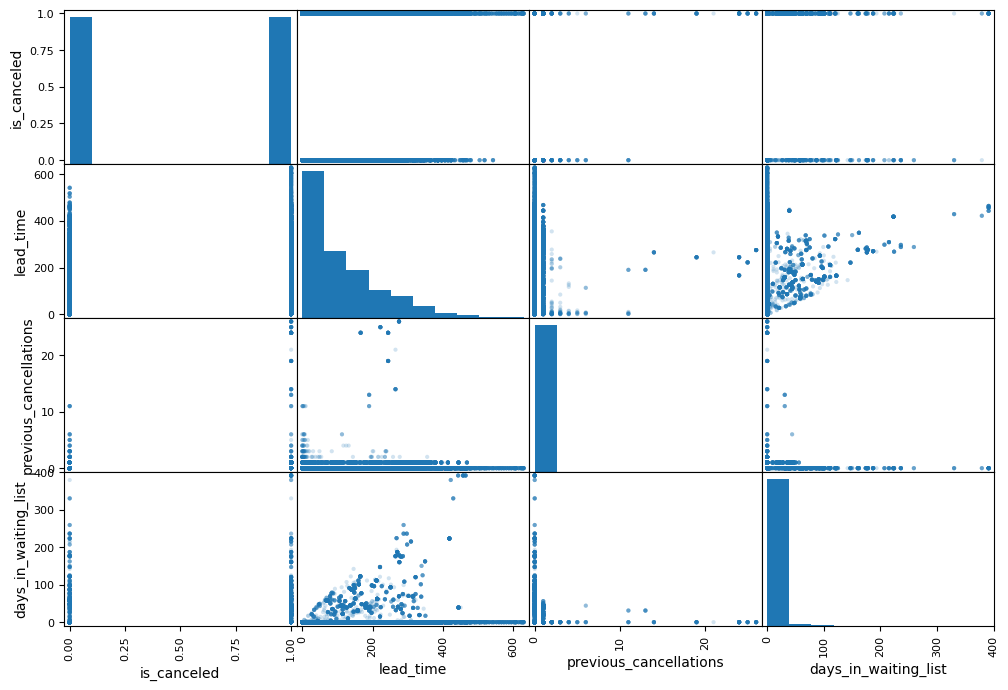

In [9]:
from pandas.plotting import scatter_matrix

attributes = ["is_canceled", "lead_time", "previous_cancellations", "days_in_waiting_list"]
scatter_matrix(hotel[attributes], figsize=(12, 8))

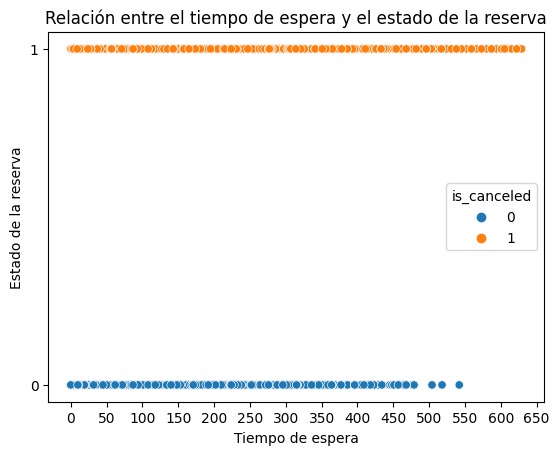

In [19]:
sns.scatterplot(x='lead_time', y='is_canceled', data=hotel, hue='is_canceled')
plt.gca().set_title('Relación entre el tiempo de espera y el estado de la reserva')
plt.gca().set_xlabel('Tiempo de espera')
plt.gca().set_ylabel('Estado de la reserva')
plt.gca().set_xticks(range(0, 700, 50))
plt.gca().set_yticks(range(0, 2, 1))
plt.show()

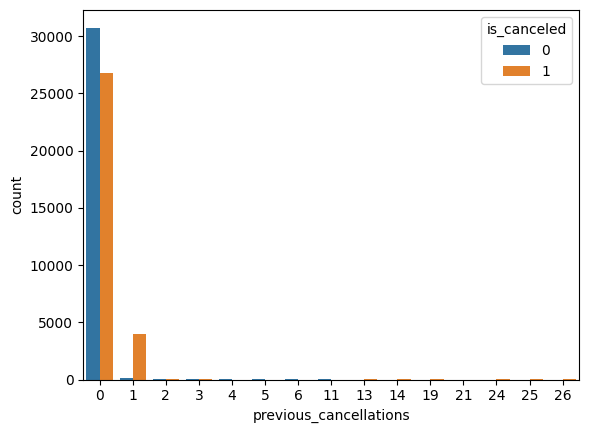

In [35]:
sns.countplot(x='previous_cancellations', hue='is_canceled', data=hotel)
plt.show()